In [7]:
import glob
dirs = glob.glob("MLII"+"/*", recursive=True)


In [8]:
def get_files_from_dir(_dir):
    return glob.glob(_dir+"/*", recursive=True)

In [9]:
import re

def get_name_dir(_dir_text):
    pattern = r'\b(\w+)\b$'
    match = re.search(pattern, _dir_text)
    if match:
        last_word = match.group(1)
        return last_word
    return None

text = 'MLII\7 PVC'
get_name_dir(text)



'PVC'

In [10]:
from scipy.io import loadmat
import matplotlib.pyplot as plt



In [11]:
import numpy as np
import pywt



 Fs=1000 hz
 Ts=0.001 s
[ 0.00324684  0.00963466  0.00644075 ... -0.0063349  -0.02230445
 -0.03188618]
 Fs=46950 hz
 Ts=0.001 s


(0.0, 500.0)

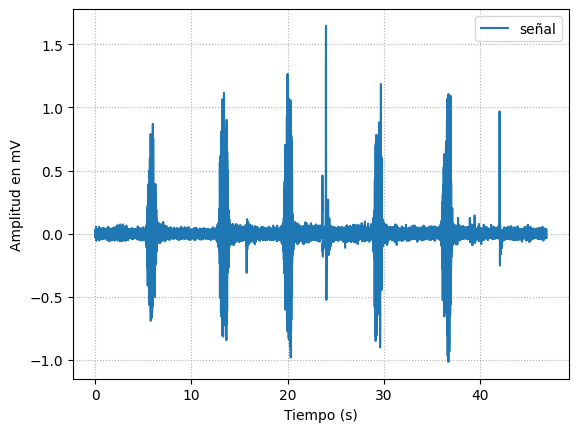

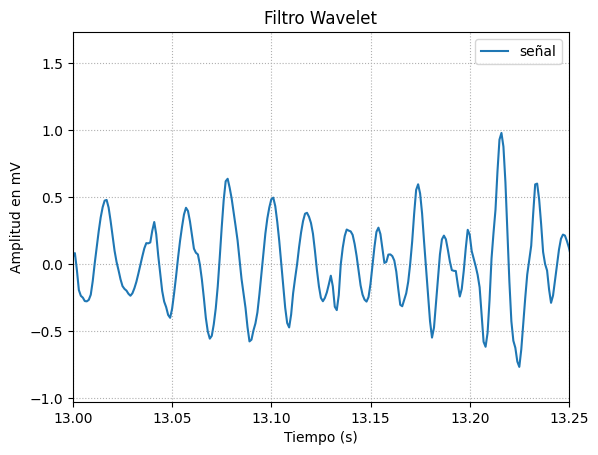

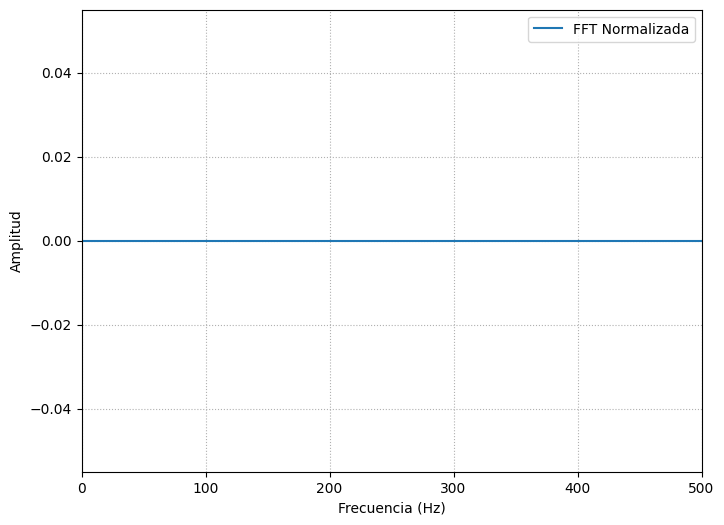

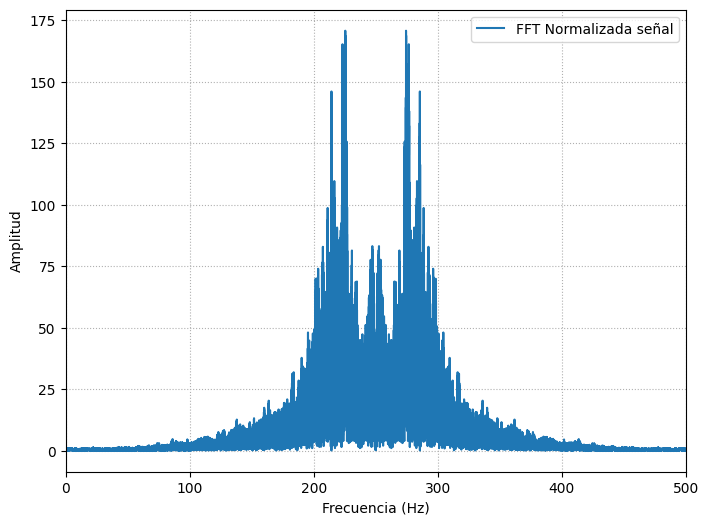

In [12]:

f = open("Nataly.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()


raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")


a = np.genfromtxt("./Nataly.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
bits = 10 # Bits de la salida
volt_range = 3.3
yarray = (yarray/2**bits -1/2) * volt_range/1009
yarray=yarray*1000 # convertir los bits a mV
yarray = yarray - np.mean(yarray) # Centrar la señal, ya que va de -1.64 a 1.64
xarray = np.arange(1, len(yarray)+1)/Fs
print(yarray)
xarray=xarray
plt.plot(xarray, yarray, label="señal")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud en mV")
plt.legend(loc="upper right")


#Filtro Wavelet
niveles = 5
coeficientes = pywt.wavedec(yarray, 'db6', level=niveles)
umbral = 0.09

coeficientes_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes]

senal_filtrada = pywt.waverec(coeficientes_umbral, 'db6')

N=1024

plt.figure()
plt.plot(xarray,senal_filtrada, label="señal")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud en mV")
plt.legend(loc="upper right")
plt.title("Filtro Wavelet")
plt.xlim(13, 13.25)

#frecuencias
F = np.linspace(0, Fs/2, N//2)


#FFT de la señal
Y = np.fft.fft(senal_filtrada,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)



# Graficar la FFT normalizada
plt.figure(figsize=(8, 6))
plt.plot(F, Ym, label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)  # Limitar el rango de frecuencias de 0 a Fs/2 Hz en la gráfica



# Calcular la FFT de la señal filtrada
signal_fft = np.fft.fft(senal_filtrada)
frequencies = np.fft.fftfreq(N, Ts)

# Reorganizar las frecuencias para que estén en el rango de -Fs/2 a Fs/2
frequencies = np.fft.fftshift(frequencies)
signal_fft = np.fft.fftshift(signal_fft)

tam=len(np.abs(signal_fft))
print(f" Fs={len(np.abs(signal_fft))} hz\n Ts={Ts} s")
#frecuencias
F1 = np.linspace(0, Fs/2, tam)
# Graficar la FFT normalizada
plt.figure(figsize=(8, 6))
plt.plot(F1, np.abs(signal_fft), label="FFT Normalizada señal")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)  # Limitar el rango de frecuencias de 0 a Fs/2 Hz en la gráfica






